In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the same data you used in Phase 4
df = pd.read_csv('engineered_furniture_data.csv')

In [3]:
# Drop unused columns to match model
drop_cols = [col for col in ['sold', 'log_sold', 'tagText', 'productTitle'] if col in df.columns]
X = df.drop(columns=drop_cols)
y = df['log_sold']

In [4]:
# Train-test split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
from sklearn.impute import SimpleImputer

# Create an imputer that fills NaNs with column means
imputer = SimpleImputer(strategy='mean')

# Apply to X (before train-test split)
X_imputed = imputer.fit_transform(X)


In [7]:
# Use the imputed X for training
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)


In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [9]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("📊 Random Forest Regressor")
print(f"  MSE: {mse_rf:.4f}")
print(f"  R² Score: {r2_rf:.4f}")


📊 Random Forest Regressor
  MSE: 1.2416
  R² Score: 0.3545


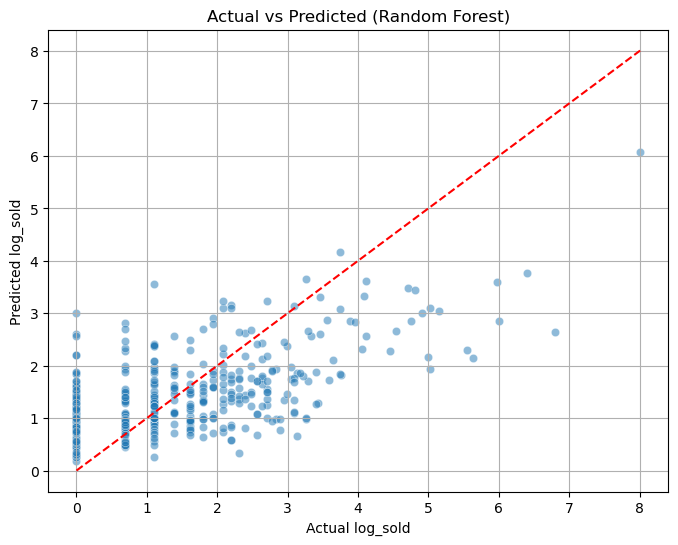

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual log_sold")
plt.ylabel("Predicted log_sold")
plt.title("Actual vs Predicted (Random Forest)")
plt.grid()
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


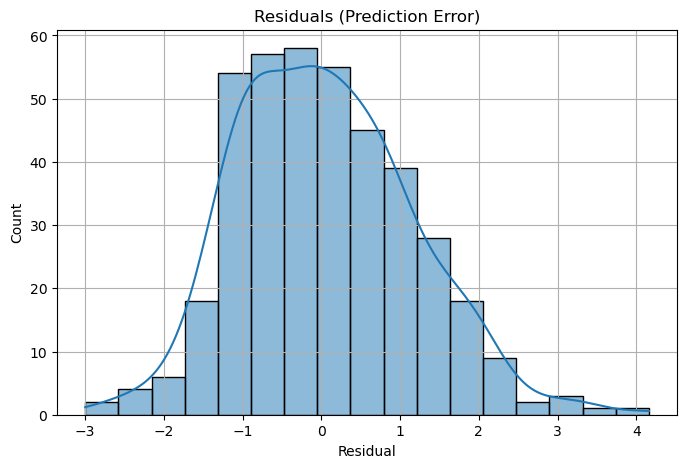

In [11]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals (Prediction Error)")
plt.xlabel("Residual")
plt.grid()
plt.show()


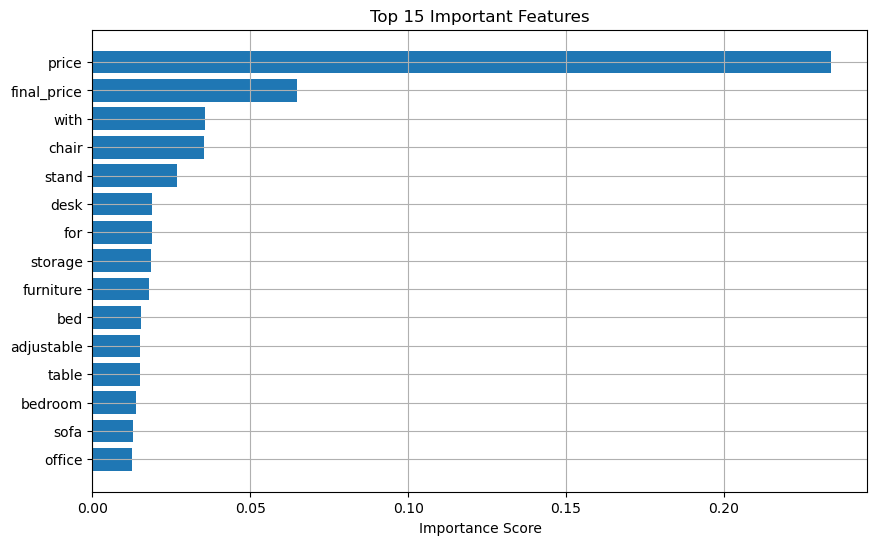

In [12]:
importances = rf.feature_importances_
feature_names = X.columns

# Top 15
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.grid()
plt.show()

